# Detect AI vs. Human-Generated Images
This dataset comes from Kaggle.
https://www.kaggle.com/competitions/detect-ai-vs-human-generated-images

## Purpose
The purpose is to develop a model to distinguish between AI generated and human generated images. The dataset includes image pairs of human generated images that were captioned and AI generated images based on the captions.

## EDA
Below are pairs of example images to visualize the nature of the dataset.

In [4]:
%pip install kagglehub torch lightning pandas pillow matplotlib torchvision scikit-learn --quiet

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Kaggle provide the following code when you click on the Download button
# import kagglehub

# Download latest version
# path = kagglehub.dataset_download("alessandrasala79/ai-vs-human-generated-dataset")
# If I've cached my own version of the dataset
path = "./"
print("Path to dataset files:", path)

Path to dataset files: ./


In [7]:
import pandas as pd

train_df = pd.read_csv(path + "/train.csv")
test_df = pd.read_csv(path + "/test.csv")

print("Train shape:", train_df.shape)
print(train_df.head())
print("\nTest shape:", test_df.shape)
print(test_df.head())

# the dataframe contain labels and filenames to the images

Train shape: (79950, 3)
   Unnamed: 0                                        file_name  label
0           0  train_data/a6dcb93f596a43249135678dfcfc17ea.jpg      1
1           1  train_data/041be3153810433ab146bc97d5af505c.jpg      0
2           2  train_data/615df26ce9494e5db2f70e57ce7a3a4f.jpg      1
3           3  train_data/8542fe161d9147be8e835e50c0de39cd.jpg      0
4           4  train_data/5d81fa12bc3b4cea8c94a6700a477cf2.jpg      1

Test shape: (5540, 1)
                                                  id
0  test_data_v2/1a2d9fd3e21b4266aea1f66b30aed157.jpg
1  test_data_v2/ab5df8f441fe4fbf9dc9c6baae699dc7.jpg
2  test_data_v2/eb364dd2dfe34feda0e52466b7ce7956.jpg
3  test_data_v2/f76c2580e9644d85a741a42c6f6b39c0.jpg
4  test_data_v2/a16495c578b7494683805484ca27cf9f.jpg


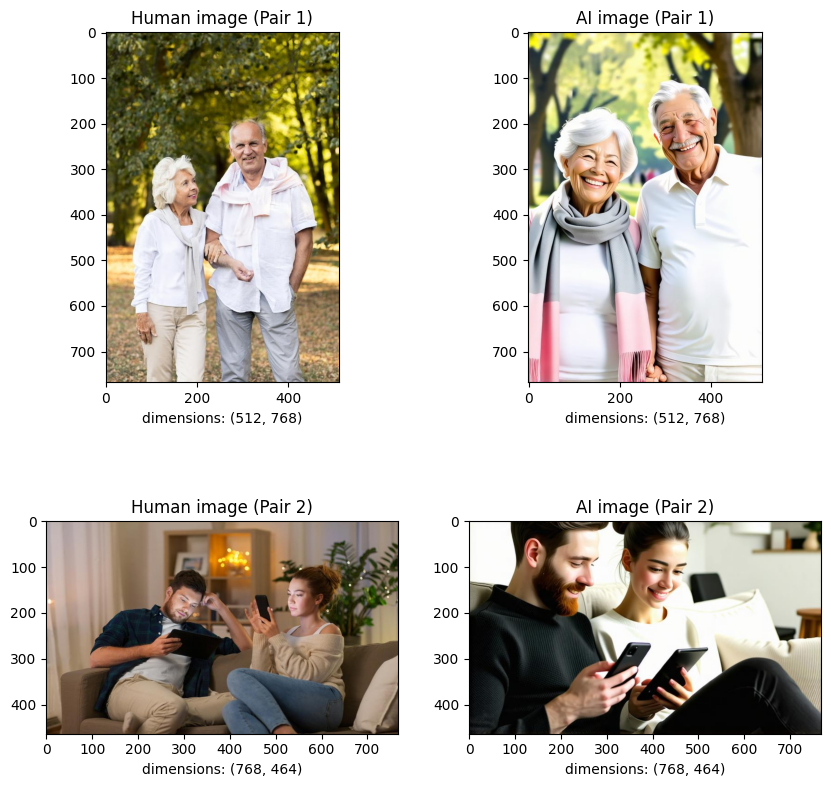

In [8]:
from PIL import Image
from matplotlib import pyplot as plt

# Load the first pair of images
human_image1 = Image.open(path + "/" + train_df[train_df["label"] == 0]["file_name"].iloc[0])
ai_image1 = Image.open(path + "/" + train_df[train_df["label"] == 1]["file_name"].iloc[0])

# Load the second pair of images
from random import randint
i = randint(1, len(train_df[train_df["label"] == 0]))
human_image2 = Image.open(path + "/" + train_df[train_df["label"] == 0]["file_name"].iloc[i])
ai_image2 = Image.open(path + "/" + train_df[train_df["label"] == 1]["file_name"].iloc[i])

# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# First row: first pair of images
axes[0, 0].imshow(human_image1)
axes[0, 0].set_title("Human image (Pair 1)")
dimensions = human_image1.size
axes[0, 0].set_xlabel(f"dimensions: {dimensions}")

axes[0, 1].imshow(ai_image1)
axes[0, 1].set_title("AI image (Pair 1)")
dimensions = ai_image1.size
axes[0, 1].set_xlabel(f"dimensions: {dimensions}")

# Second row: second pair of images
axes[1, 0].imshow(human_image2)
axes[1, 0].set_title("Human image (Pair 2)")
dimensions = human_image2.size
axes[1, 0].set_xlabel(f"dimensions: {dimensions}")

axes[1, 1].imshow(ai_image2)
axes[1, 1].set_title("AI image (Pair 2)")
dimensions = ai_image2.size
axes[1, 1].set_xlabel(f"dimensions: {dimensions}")

plt.show()


## EDA cont...
The images are in a variety of sizes and aspect ratios all with some sidelength of 768 and a second sidelength of a variety of values. Most of the images are RGB with a few black and white images.

The model will require transformations to a consistent size and aspect ratio. Also, the black and white images will be transformed to RGB images.

In [15]:
# Check all of the images and list all dimensions
dimensions = set()
modes = set()
for file_name in train_df["file_name"]:
    image = Image.open(path + "/" + file_name)
    dimensions.add(image.size)
    modes.add(image.mode)

print(dimensions)
print(modes)

{(768, 576), (480, 768), (768, 640), (416, 768), (768, 704), (656, 768), (768, 768), (592, 768), (704, 768), (528, 768), (352, 768), (640, 768), (768, 176), (768, 112), (768, 240), (768, 304), (768, 368), (768, 432), (768, 496), (768, 560), (464, 768), (768, 624), (768, 688), (768, 752), (576, 768), (752, 768), (688, 768), (512, 768), (336, 768), (768, 160), (448, 768), (400, 768), (768, 224), (768, 288), (624, 768), (768, 352), (768, 416), (768, 480), (768, 544), (768, 608), (768, 672), (736, 768), (768, 736), (560, 768), (384, 768), (496, 768), (320, 768), (768, 144), (432, 768), (768, 208), (768, 272), (768, 336), (768, 528), (768, 400), (768, 592), (768, 464), (768, 656), (768, 720), (672, 768), (608, 768), (720, 768), (544, 768), (768, 128), (368, 768), (768, 192), (768, 256), (768, 320), (768, 384), (768, 448), (768, 512)}
{'RGB', 'L'}

{(768, 576), (480, 768), (768, 640), (416, 768), (768, 704), (656, 768), (768, 768), (592, 768), (704, 768), (528, 768), (352, 768), (640, 768), (768, 176), (768, 112), (768, 240), (768, 304), (768, 368), (768, 432), (768, 496), (768, 560), (464, 768), (768, 624), (768, 688), (768, 752), (576, 768), (752, 768), (688, 768), (512, 768), (336, 768), (768, 160), (448, 768), (400, 768), (768, 224), (768, 288), (624, 768), (768, 352), (768, 416), (768, 480), (768, 544), (768, 608), (768, 672), (736, 768), (768, 736), (560, 768), (384, 768), (496, 768), (320, 768), (768, 144), (432, 768), (768, 208), (768, 272), (768, 336), (768, 528), (768, 400), (768, 592), (768, 464), (768, 656), (768, 720), (672, 768), (608, 768), (720, 768), (544, 768), (768, 128), (368, 768), (768, 192), (768, 256), (768, 320), (768, 384), (768, 448), (768, 512)}
{'RGB', 'L'}


{'L', 'RGB'}

## EDA cont...
Both for my own model as well as a ResNet based model, normalizing on dataset statistics is a good practice. The good below generates the statistics for the dataset. I use a transform to resize to the image size I intend to use for both models (512x512).

### Statistics
Mean: [0.6238067150115967, 0.5922583341598511, 0.5293540358543396]

Std: [0.3335755169391632, 0.3218654990196228, 0.3552871346473694]

In [18]:
from ImageDataset import ImageDataset
import torch
from torchvision import transforms

# Transform: Convert to Tensor only (no normalization yet)
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor()
])

stat_dataset = ImageDataset(path, train_df, transform=transform)
loader = torch.utils.data.DataLoader(stat_dataset, batch_size=64, shuffle=False, num_workers=4)

# Compute mean and std
sum_channels = torch.zeros(3)
sum_squared_channels = torch.zeros(3)
n_samples = 0  # Track the actual number of image samples

for batch in loader:
    images = batch[0]  # Extract only images, ignore labels
    batch_samples = images.size(0)  # Actual batch size (handles smaller last batch)
    images = images.view(batch_samples, 3, -1)  # Flatten spatial dimensions

    # Accumulate sum and squared sum per channel
    sum_channels += images.sum(dim=[0, 2])  # Sum of pixel values
    sum_squared_channels += (images ** 2).sum(dim=[0, 2])  # Sum of squared pixel values
    n_samples += batch_samples  # Keep track of actual image count

# Compute mean and std per channel
mean = sum_channels / (n_samples * images.shape[2])  # Divide by total number of pixels
std = torch.sqrt((sum_squared_channels / (n_samples * images.shape[2])) - (mean ** 2))  # std = sqrt(E[X²] - (E[X])²)

print("Mean:", mean.tolist())
print("Std:", std.tolist())

# Mean: [0.6238067150115967, 0.5922583341598511, 0.5293540358543396]
# Std: [0.3335755169391632, 0.3218655586242676, 0.3552871346473694]

Mean: [0.6238067150115967, 0.5922583341598511, 0.5293540358543396]
Std: [0.3335755169391632, 0.3218655586242676, 0.3552871346473694]


# Data Cleaning
torchvision transformers will be used to convert images all to RGB format and a common size of 512x512

There are no known mistakes in the dataset to address.

## Pytorch with Lightning
I've been learning Pytorch and Lightning as an alternative to Tensorflow and Keras. The newer libraries are more popular and Lightning provides significant utility wrapping Pytorch.

## The Models
I consider two models:
1. a classical CNN approach with multiple convolution and pooling layers before a final set of fully connected layers.
2. A ResNet50 based model using a pretrained ResNet50 with a replaced final layer. The whole model was retrained on the new dataset.
3. A ResNet50 based model without pretraining and with additional regularization.

In training the first two models, I observed the ResNet based model was highly erratic in terms of validation loss. While the ResNet model achieved higher accuracy in fewer epochs, it seemed likely to overfit on the training data. The simpler model trained for longer may be superior. It is also possible that the ResNet model could be improved with additional regularization or simply training the model with random initialization in stead of the pretrained weights.

The third model had enhanced regularization in the form of L2 regularization and learning rate scheduling. A jitter transform was added to vary hue, saturation, brightness, and contrast. Additionally, pretrained weights were **not** used. 

<figure>
<img width="200px" src="improved-stability-transforms.png">
<figcaption>Stability improved dues to enhanced regularization.</figcaption>
</figure>
 <figure>
<img width="200px" src="learning-rate-regularization.png">
<figcaption>Learning rate scheduling was used and various hyperparameters were tried.</figcaption>
</figure>

## Hyperparameter Tuning

Because of training time and cost, hyperparameter tuning was limited. Each of the following hyperparameters was tuned across about 40 partial training runs.
- Learning Rate and Learning Rate Scheduling - this was optimized for stability of validation loss.
- L2 Regularization (weight decay setting in Pytorch) - This improved stability of validation loss during training
- Batch Size - This was optimized for training time and memory usage. When training using A100s on Google Colab, batch sizes of 64 were used. When training on my Macbook Pro, batch sizes of 16 were used.
- Transformations
    - Random Jitter was a late addition and made a significant difference in training stability.
    - Rotation - I found a modest rotation range of 10 degrees improved training stability over an agressive rotation of 45 degrees.

## Future Models to Try
The week four GAN assigment has me curious about a GAN based model for this challenge. The model would both attempt to make convincing fakes while discriminating effectively between genuine and fake images. This more complex model may do a better job generalizing to unknown test images if it identifies the stylistic differences between AI and human generated images.

## Conclusion
Final results achieved validation losses under 0.1. This particular challenge proved to be somewhat on the easier side. Training stabilty is an important consideration. The complex ResNet model was unstable without enhanced regularization where the simpler CNN model appears to be stable, but less discerning.

<figure>
<img width="200px" src="train_loss_10epochs.png">
<figcaption>Train Loss - ResNet in red, CNN in Blue</figcaption>
</figure>
<figure>
<img width="200px" src="val_loss_10epochs.png">
<figcaption>Validation Loss - ResNet in red, CNN in Blue</figcaption>
</figure>

The ResNet model did achieve better accuracy in fewer epochs, but the wild swings in validation loss suggest the model is overfitting. It is important to consider the risk of overfitting when selecting a model.

The task overall is distinct from image labeling tasks. This may be part of why the ResNet model is limited. I believe, the convolutional layers will need to identify stylistic differences rather than structual differences to differentiate between AI and human generated images. As an observer I have noted that AI images are often less detailed and appear more like heavily processed images.

### Conclusions about Pytorch and Lightning

In addition to the main task of the project, learning about deep learning models, I took this as an opportunity to learn more about Pytorch and Lightning. I found the experience to be excellent. Both project have excellent documentation. In particular I found code organization more intuitive in Pytorch with Lightning. Also, early stopping, checkpointing, learning rate optimization, and hyperparameter tuning are all more intuitive. Logging in Lightning was also very helpful in understanding the training process. The screenshots of training loss and validation loss above were generated by Lightning logs loaded in Tensorboard.

In [ ]:
# Example setup for training the model
import lightning as L
import torch

torch.set_float32_matmul_precision('high')

from model import ResNetBinaryClassifier, CNN_Binary_Classifier
from ImageDataset import ImageDataset
from datamodule import DataModule

model = CNN_Binary_Classifier()
trainer = L.Trainer(max_epochs=100)
datamodule = DataModule(path, fraction=0.2, num_workers=10, batch_size=16, persistent_workers=True)

trainer.fit(model, datamodule)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/lawton.willingham/Library/Python/3.9/lib/python/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default

  | Name       | Type              | Params | Mode 
---------------------------------------------------------
0 | conv1      | Conv2d            | 448    | train
1 | conv2      | Conv2d            | 4.6 K  | train
2 | conv3      | Conv2d            | 18.5 K | train
3 | conv4      | Conv2d            | 73.9 K | train
4 | pool     

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Detected KeyboardInterrupt, attempting graceful shutdown ...


In [24]:
# example of testing and demonstrating the model
import lightning as L
import torch
from torchvision import transforms
from PIL import Image
import pandas as pd
from model import ResNetBinaryClassifier, CNN_Binary_Classifier
from ImageDataset import ImageDataset
from datamodule import DataModule

path = "./"

trainer = L.Trainer()
datamodule = DataModule(path, fraction=0.1, num_workers=10, batch_size=8, persistent_workers=True)

torch.set_float32_matmul_precision('high')

model = ResNetBinaryClassifier.load_from_checkpoint("resnet.ckpt")

trainer.test(model, datamodule)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Testing DataLoader 0: 100%|██████████| 200/200 [00:32<00:00,  6.17it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.07405918836593628    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.07405918836593628}]

output: AI generated with raw sigmoid 0.9999635219573975


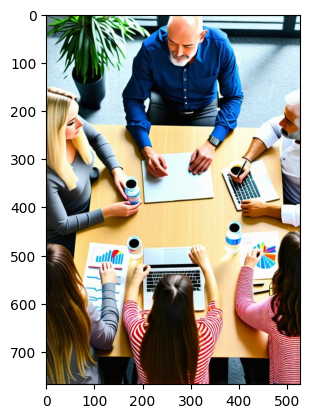

output: Human generated with raw sigmoid 0.0013787412317469716


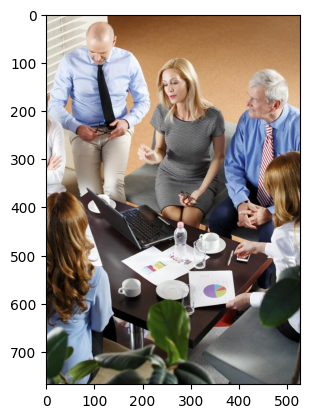

output: AI generated with raw sigmoid 0.74955815076828


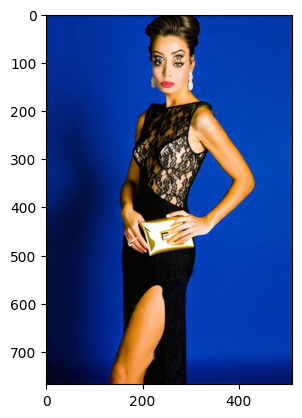

output: Human generated with raw sigmoid 0.026376087218523026


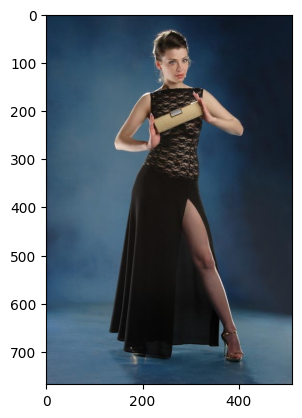

output: AI generated with raw sigmoid 0.8547254204750061


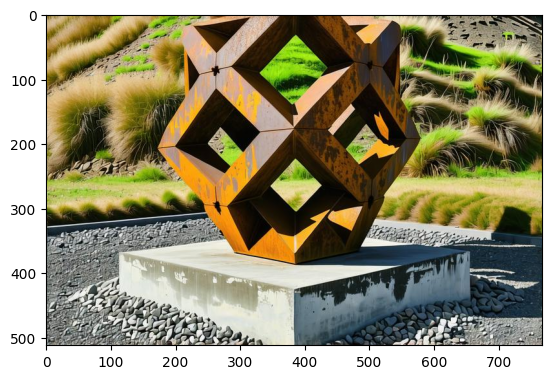

output: Human generated with raw sigmoid 0.0005642246687784791


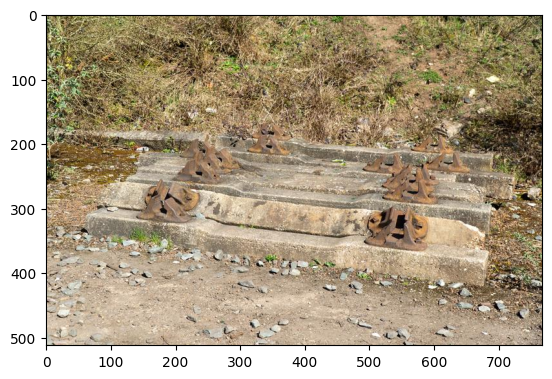

In [26]:

test_df = pd.read_csv(path + "/train.csv")

mean = (0.6238067150115967, 0.5922583341598511, 0.5293540358543396)
std = (0.3335755169391632, 0.3218654990196228, 0.3552871346473694)

transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

for i in range(102,108):

    orig_image = Image.open(path + "/" + test_df["file_name"].iloc[i]).convert("RGB")


    test_image = transform(orig_image).unsqueeze(0)
    model.eval()
    output = model(test_image).detach()
    output = torch.sigmoid(output).item()
    output_text = "AI generated" if output > 0.5 else "Human generated"
    print(f"output: {output_text} with raw sigmoid {output}")

    # Display the image
    from matplotlib import pyplot as plt
    plt.imshow(orig_image)
    plt.show()